In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scikitplot.metrics import plot_cumulative_gain    
from scipy.stats.contingency import odds_ratio
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
# reading the data
df = pd.read_csv("./Heart data.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [42]:
# variable variation
# for i in df.columns:
#     df.boxplot(column=i)
#     plt.grid(False)
#     plt.show()

In [43]:
# checking nulls
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [44]:
# considering that outliers are seldom but magnificent in 
# most of the independent variables with nulls, median values
# will be used to fill them

df = df.fillna(df.median())

In [45]:
# dummy variables for sex

dummies = pd.get_dummies(df['male'], prefix='sex_', dtype='int')
df = pd.concat([df,dummies], axis=1)
df.drop(['male'], inplace=True, axis=1)


In [46]:
# dummy variables for education
dummies = pd.get_dummies(df['education'], prefix='education', dtype='int')
df = pd.concat([df,dummies], axis=1)
df.drop(['education'], inplace=True, axis=1)

In [47]:
# changing sex columns names

df.rename(columns={'sex__0':'female','sex__1': "male"}, inplace=True)

In [48]:
# getting rid of extreme outliers

df= df[df['cigsPerDay'] < 55]
df=df[df['totChol'] < 500]
df=df[df['sysBP'] < 260]
df=df[df['BMI']<48]
df=df[df['heartRate']<132]
df.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,female,male,education_1.0,education_2.0,education_3.0,education_4.0
count,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000
mean,49.570988,0.493245,8.806589,0.029154,0.005689,0.309315,0.025598,236.426404,132.267836,82.851031,25.782446,75.835269,81.590898,0.151458,0.571936,0.428064,0.405072,0.320455,0.162598,0.111875
std,8.570400,0.500014,11.597017,0.168258,0.075217,0.462266,0.157953,43.427386,21.874688,11.861708,4.021781,11.946722,22.892796,0.358537,0.494857,0.494857,0.490964,0.466707,0.369042,0.315250
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,143.500000,89.500000,28.010000,83.000000,85.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,70.000000,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,45.800000,130.000000,394.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


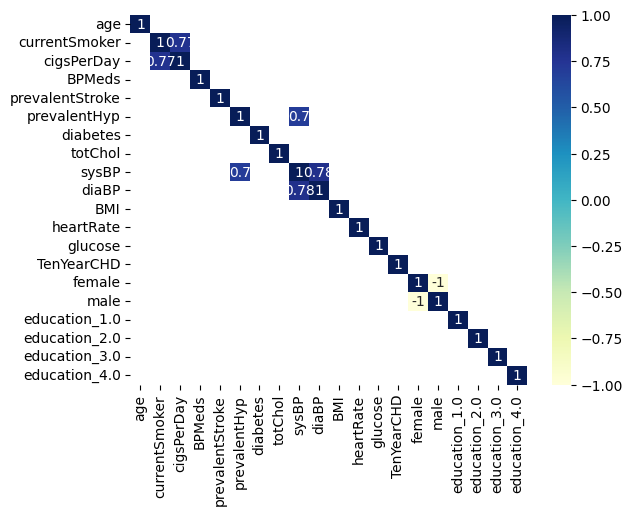

In [49]:
# checking for multicolinearity 
corr = df.corr()
mask = np.abs(corr) <= 0.65

dataplot = sns.heatmap(corr, mask=mask, cmap="YlGnBu", annot=True) 

plt.show() 

In [50]:
df.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,female,male,education_1.0,education_2.0,education_3.0,education_4.0
count,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000
mean,49.570988,0.493245,8.806589,0.029154,0.005689,0.309315,0.025598,236.426404,132.267836,82.851031,25.782446,75.835269,81.590898,0.151458,0.571936,0.428064,0.405072,0.320455,0.162598,0.111875
std,8.570400,0.500014,11.597017,0.168258,0.075217,0.462266,0.157953,43.427386,21.874688,11.861708,4.021781,11.946722,22.892796,0.358537,0.494857,0.494857,0.490964,0.466707,0.369042,0.315250
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,143.500000,89.500000,28.010000,83.000000,85.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,70.000000,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,45.800000,130.000000,394.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
# changing variables to logs or using minmax scales makes the model perform slightly worse or the same

# df['sysBP'] = np.log(df['sysBP'])
# df['totChol'] = np.log(df['totChol'])
# df['glucose'] = np.log(df['glucose'])
# df.describe()
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df.age = scaler.fit_transform(df[["age"]])

In [52]:
# from the results we can see that diaBP and prevalentHyp variables are multicollinear therefore should be dropped

df.drop(['diaBP','prevalentHyp'], axis=1, inplace=True)

In [53]:
# correlations 

df.corr()['TenYearCHD'].sort_values(ascending = False)

TenYearCHD         1.000000
age                0.224297
sysBP              0.212623
glucose            0.120777
diabetes           0.094789
male               0.090152
BPMeds             0.087915
education_1.0      0.083717
totChol            0.080951
BMI                0.070455
prevalentStroke    0.064747
cigsPerDay         0.061385
heartRate          0.023427
currentSmoker      0.020917
education_4.0     -0.003121
education_3.0     -0.028489
education_2.0     -0.063432
female            -0.090152
Name: TenYearCHD, dtype: float64

Optimization terminated successfully.
         Current function value: 0.392700
         Iterations 6


{'whiskers': [<matplotlib.lines.Line2D at 0x239e4618800>,
 'caps': [<matplotlib.lines.Line2D at 0x239e4618f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x239e45d74a0>],
 'medians': [<matplotlib.lines.Line2D at 0x239e4619550>],
 'fliers': [<matplotlib.lines.Line2D at 0x239e46196a0>],
 'means': []}

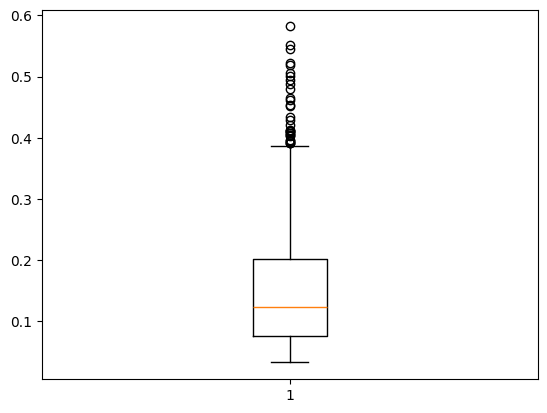

In [54]:
# both forward and backward stepwise regression modeling brought 
# the same result of getting the best model by using only the two most correlated variables

X_train, x_test, Y_train, y_test = train_test_split(df[['age','sysBP']], df['TenYearCHD'], test_size=0.2, random_state=1)
model = sm.Logit(Y_train, sm.add_constant(X_train)).fit()
predictions = model.predict(sm.add_constant(x_test))

plt.boxplot(predictions)


In [55]:
# because most of the predictions lie under 0.2 values, 
# the cutoff point is lowered to 0.1 for getting the best fit of a model

predictions = [1 if i > 0.1 else 0 for i in predictions]
auc_roc = roc_auc_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("AUC_ROC score: ", auc_roc)
print("Accuracy: ", accuracy)
print("Recall score: ", recall_score(y_test,predictions))

AUC_ROC score:  0.6500343921608426
Accuracy:  0.5
Recall score:  0.8617886178861789


In [56]:
# because the model aims to correctly identify risk of heart rate,
# the true positives are much more important than false negatives,
# therefore the model focuses on increasing the recall score

In [57]:
# getting odd ratios
print(model.summary())
# ood ratios
print("\nOdd ratios:\n", np.exp(model.params))


                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3375
Model:                          Logit   Df Residuals:                     3372
Method:                           MLE   Df Model:                            2
Date:                Wed, 24 Apr 2024   Pseudo R-squ.:                 0.08181
Time:                        06:02:00   Log-Likelihood:                -1325.4
converged:                       True   LL-Null:                       -1443.4
Covariance Type:            nonrobust   LLR p-value:                 5.210e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0447      0.375    -18.785      0.000      -7.780      -6.310
age            0.0589      0.006      9.299      0.000       0.046       0.071
sysBP          0.0169      0.002      7.777      0.0

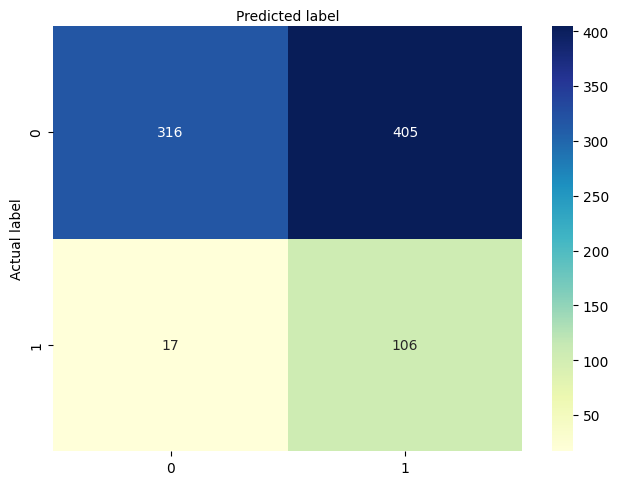

In [60]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
cnfMatrix = confusion_matrix(y_test, predictions)
sns.heatmap(pd.DataFrame(cnfMatrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Model evaluation
Considering that the model is predicting medical data, the 10 year hear disease risk, it is focused on predicting true positives.
Having that in mind, model is able to predict 106 out of 123 true positives (sensitivity) and the price of having slightly worse specificity and accuracy.
